In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD  
import keras,os
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from PIL import Image, ImageEnhance
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def salt(image):
    row,col = image.shape
    s_vs_p = 0.5
    amount = 0.004
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape]
    out[coords] = 0
    return out

In [ ]:
def darken(img, factor):
    im = Image.fromarray(np.uint8(img)).convert('RGB')
    enhancer = ImageEnhance.Brightness(im)
    im_output = enhancer.enhance(factor)
    return cv2.cvtColor(np.asarray(im_output), cv2.COLOR_BGR2GRAY)

In [ ]:
temp_in = []
temp_out = []

#factor = [0.1]
#for f in factor:
for i in x:
    noise = salt(i.reshape(64,64))
    dark = darken(noise,0.3)
    
    temp_in.append(dark)
    temp_out.append(i)
temp_in = np.array(temp_in)
temp_out = np.array(temp_out)

print('temp in: ', temp_in.shape)
print('temp out: ', temp_out.shape)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


temp in:  (55267, 64, 64)
temp out:  (55267, 64, 64)


In [ ]:
temp_in = temp_in.reshape(-1,64,64,1)/255.0
x = x.reshape(-1,64,64,1)/255.0

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense,ZeroPadding2D

In [ ]:
model = Sequential()
model.add(Conv2D(16, (2,2), activation='relu', input_shape=(64,64,1) ))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2DTranspose(8,(3,3), activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2DTranspose(16,(3,3), activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(1, (3,3), activation='relu'))

model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 63, 63, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 8)         1160      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 34, 34, 16)       

In [ ]:
history = model.fit(temp_in, x, batch_size=100, validation_split=0.1, epochs=10)

Train on 49740 samples, validate on 5527 samples
Epoch 1/10
49740/49740 [==============================] - 14s 289us/step - loss: 0.0314 - val_loss: 0.0055
Epoch 2/10
49740/49740 [==============================] - 8s 157us/step - loss: 0.0033 - val_loss: 0.0041
Epoch 3/10
49740/49740 [==============================] - 8s 157us/step - loss: 0.0027 - val_loss: 0.0036
Epoch 4/10
49740/49740 [==============================] - 8s 157us/step - loss: 0.0023 - val_loss: 0.0029
Epoch 5/10
49740/49740 [==============================] - 8s 158us/step - loss: 0.0018 - val_loss: 0.0024
Epoch 6/10
49740/49740 [==============================] - 8s 159us/step - loss: 0.0015 - val_loss: 0.0020
Epoch 7/10
49740/49740 [==============================] - 8s 159us/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8/10
49740/49740 [==============================] - 8s 158us/step - loss: 0.0012 - val_loss: 0.0016
Epoch 9/10
49740/49740 [==============================] - 8s 158us/step - loss: 0.0011 - val_loss: 0.0

In [ ]:
pred = model.predict(temp_in[67].reshape(1,64,64,1))

In [ ]:
img1=cv2.imread('test3.jpg',0)
img = cv2.resize(img1, (64,64))
pred = model.predict(img.reshape(1,64,64,1))


Text(0.5, 1.0, 'generated')

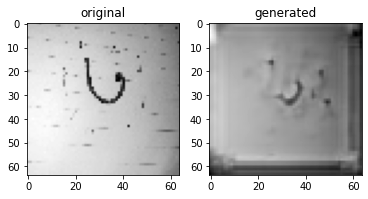

In [ ]:
plt.subplot(121)
plt.imshow(img.reshape(64,64), cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(pred.reshape(64,64), cmap='gray')
plt.title('generated')